<a href="https://colab.research.google.com/github/tree-jhk/Convolution-calculation-implement/blob/main/Convolution_calculation_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An example of a basic implement of convolution  

ex) 4x4 input data convolution with 3x3 kernel in (stride = 1) to 2x2 feature map(output)

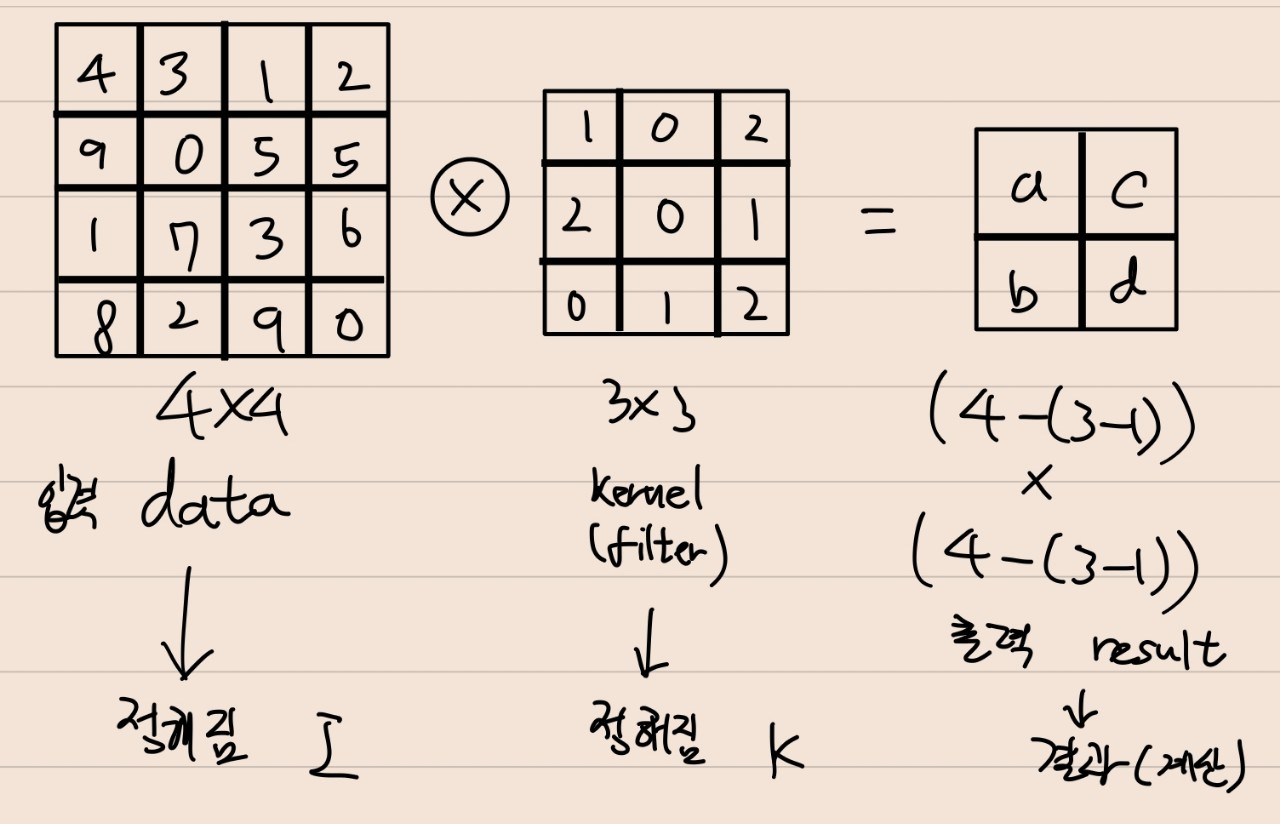

In [ ]:
import numpy as np

input = np.array([[4,3,1,2],[9,0,5,5],[1,7,3,6],[8,2,9,0]])
kernel = np.array([[1,0,2],[2,0,1],[0,1,2]])
output = []

input_x, input_y = np.shape(input)
kernel_x, kernel_y = np.shape(kernel)

for i in range(input_x - (kernel_x - 1)):
  for j in range(input_y - (kernel_y - 1)):
    output.append((input[i:i+kernel_y,j:j+kernel_y] * kernel).sum())

output = np.array(output).reshape(2,2) #reshaping to 2x2 array
print(output)

[[42 27]
 [44 39]]


# setting stride available

In [11]:
def convolution(input, kernel, stride):
  import numpy as np
  input_x, input_y = np.shape(input)
  kernel_x, kernel_y = np.shape(kernel)
#checking if convolution is available
  if (input_x - kernel_x)%stride == 0 and (input_y - kernel_y)%stride == 0:
    print("convolution available")
  else:
    print("convolution not available")
    print("(input_x - kernel_x) % stride = ", (input_x - kernel_x)%stride)
    print("(input_y - kernel_y) % stride = ", (input_y - kernel_y)%stride)
    return
  output = []
#if convolution is available then, do the calculation
  for i in range(0,input_x - (kernel_x - 1),stride):
    for j in range(0,input_y - (kernel_y - 1),stride):
      output.append((input[i:i+kernel_y,j:j+kernel_y] * kernel).sum())
#calculating output's width and height
  output_width = int((input_x - kernel_x) / stride) + 1
  output_height = int((input_y - kernel_y) / stride) + 1
  print("size of output = (%s, %s)" %(output_width, output_height))
  output = np.array(output).reshape(output_width, output_height)
  return output

In [12]:
#example)

input = np.array([[1,2,3,0,-1],[0,1,2,3,-1],[3,0,1,2,-1],[2,3,0,1,-1],[2,3,0,1,-1],[2,3,0,1,-1]])
kernel = np.array([[2,0,9],[0,1,8],[1,0,7]])
print('--input--\n',input)
print('\n--kernel--\n',kernel,'\n')
print(convolution(input,kernel,stride=1))
convolution(input,kernel,stride=2)

--input--
 [[ 1  2  3  0 -1]
 [ 0  1  2  3 -1]
 [ 3  0  1  2 -1]
 [ 2  3  0  1 -1]
 [ 2  3  0  1 -1]
 [ 2  3  0  1 -1]]

--kernel--
 [[2 0 9]
 [0 1 8]
 [1 0 7]] 

convolution available
size of output = (4, 3)
[[ 56  44 -14]
 [ 28  56 -18]
 [ 20  36 -21]
 [  9  33 -23]]
convolution not available
(input_x - kernel_x) % stride =  1
(input_y - kernel_y) % stride =  0


[출처]
https://lsh-story.tistory.com/48